In [2]:
%matplotlib inline
%pylab inline
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
import palettable as pal
import matplotlib as mpl
import seaborn as sns
import numpy
import pyupset as pyu
# mpl.rcParams['font.sans-serif']='Arial'
# mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['pdf.fonttype'] = 42

Populating the interactive namespace from numpy and matplotlib


In [3]:
NCBI_ref= pd.read_csv("../evaluation/transrate_reference_trinity_v_Fhet.NCBI_Dec2018.csv")
Trinity_ref = pd.read_csv("../evaluation/transrate_reference_Fhet.NCBI_v_trinity_Dec2018.csv")

In [4]:
Trinity_ref.head()

,assembly,n_seqs,smallest,largest,n_bases,mean_len,n_under_200,n_over_1k,n_over_10k,n_with_orf,...,cov85,p_cov85,cov95,p_cov95,reference_coverage,score,optimal_score,cutoff,weighted,species
0,/pylon5/bi5fpmp/ljcohen/Fhet_reference_genome/...,41170,86,90562,130236694,3162.74525,167,35862,714,37306,...,4085,0.01242,2496,0.00759,0.04971,NaN,NaN,NaN,NaN,F_chrysotus
1,/pylon5/bi5fpmp/ljcohen/Fhet_reference_genome/...,41170,86,90562,130236694,3162.74525,167,35862,714,37306,...,4711,0.01587,2931,0.00988,0.06003,NaN,NaN,NaN,NaN,F_olivaceous
2,/pylon5/bi5fpmp/ljcohen/Fhet_reference_genome/...,41170,86,90562,130236694,3162.74525,167,35862,714,37306,...,5138,0.02233,3536,0.01537,0.07208,NaN,NaN,NaN,NaN,F_zebrinus
3,/pylon5/bi5fpmp/ljcohen/Fhet_reference_genome/...,41170,86,90562,130236694,3162.74525,167,35862,714,37306,...,6038,0.01093,3873,0.00701,0.04796,NaN,NaN,NaN,NaN,F_heteroclitusMDPP
4,/pylon5/bi5fpmp/ljcohen/Fhet_reference_genome/...,41170,86,90562,130236694,3162.74525,167,35862,714,37306,...,6418,0.01310,4323,0.00882,0.04797,NaN,NaN,NaN,NaN,F_heteroclitusMDPL


In [54]:
NCBI_v_Trinity = Trinity_ref[['species','n_contigs_with_CRBB','n_refs_with_CRBB']]
NCBI_v_Trinity = NCBI_v_Trinity.assign(Reference_Assembly="Trinity")

In [55]:
Trinity_v_NCBI = NCBI_ref[['species','n_contigs_with_CRBB','n_refs_with_CRBB']]
Trinity_v_NCBI = Trinity_v_NCBI.assign(Reference_Assembly="NCBI")

In [56]:
contigs = pd.concat([Trinity_v_NCBI,NCBI_v_Trinity],ignore_index=True)

In [57]:
contigs.head()

,species,n_contigs_with_CRBB,n_refs_with_CRBB,Reference_Assembly
0,F_chrysotus,112067,22050,NCBI
1,F_olivaceous,116192,27711,NCBI
2,F_zebrinus,99582,25760,NCBI
3,F_heteroclitusMDPP,111184,18761,NCBI
4,F_heteroclitusMDPL,178172,30354,NCBI


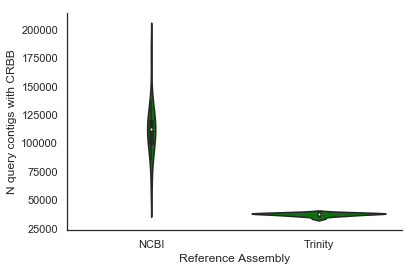

In [83]:
sns.set(style="white")
# Draw a nested violinplot and split the violins for easier comparison
ax = sns.violinplot(x="Reference_Assembly", y="n_contigs_with_CRBB",
               split=True,color="green",
               data=contigs);
sns.despine(right=True)
ax.set(xlabel='Reference Assembly', ylabel='N query contigs with CRBB')
savefig('n_contigs.png',bbox_inches="tight", dpi=300)

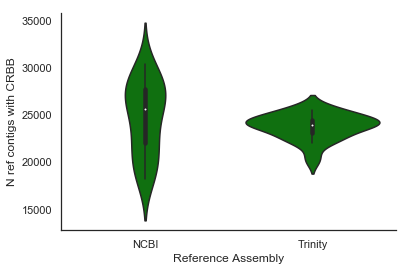

In [84]:
sns.set(style="white")
# Draw a nested violinplot and split the violins for easier comparison
ax = sns.violinplot(x="Reference_Assembly", y="n_refs_with_CRBB",
               split=True,color="green",
               data=contigs);
sns.despine(right=True)
ax.set(xlabel='Reference Assembly', ylabel='N ref contigs with CRBB')
savefig('n_refs.png',bbox_inches="tight", dpi=300)